# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset 

A base contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens, lançados em ou antes de julho de 2017. 

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


Hipóteses:
1 - Quais são os gêneros de filmes melhor avaliados?
2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?
3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [2]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [1]:
# importando as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#%matplotlib inline
import seaborn as sns

In [26]:
# Leitura do dataset
filmes = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')

In [27]:
# Pré-visaulização do dataset
filmes.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [28]:
# tamanho da nossa base
print('Número de linhas e número de colunas:', filmes.shape)

Número de linhas e número de colunas: (45466, 24)


In [29]:
filmes.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [30]:
filmes.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

--------------------------- TRATAMENTO DE DADOS NULOS ---------------------

In [31]:
# fazendo uma cópia do dataset para ser trabalhado
df = filmes.copy()

In [32]:
# quantidade de elementos nulos
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [33]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

adult                     0.00
belongs_to_collection    90.12
budget                    0.00
genres                    0.00
homepage                 82.88
id                        0.00
imdb_id                   0.04
original_language         0.02
original_title            0.00
overview                  2.10
popularity                0.01
poster_path               0.85
production_companies      0.01
production_countries      0.01
release_date              0.19
revenue                   0.01
runtime                   0.58
spoken_languages          0.01
status                    0.19
tagline                  55.10
title                     0.01
video                     0.01
vote_average              0.01
vote_count                0.01
dtype: float64

In [34]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
df.drop(['belongs_to_collection'],axis = 1, inplace = True)
df.drop(['homepage'],axis = 1, inplace = True)
df.drop(['poster_path'],axis = 1, inplace = True)     
df.drop(['tagline'],axis = 1, inplace = True)     

In [35]:
# REMOVE ELEMENTOS QUE POSSUEM DADOS NULOS
df = df.dropna()

In [36]:
# resetando os índices
df = df.reset_index()

In [37]:
# validando se ainda há registros nulos
df.isnull().sum()

index                   0
adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

TRANSFORMANDO A FEATURE "adult" EM BINÁRIO, ONDE 'True' = 0 (classificação livre) e 'False' = 1 (são somente para adultos)

In [38]:
df["classificacao"] = df["adult"].apply(lambda x: 1 if x == "False" else 0)

In [39]:
# VALIDANDO TRANSFORMAÇÃO da feature "adult"
df[["classificacao", "adult","original_title"]].head(3)

,classificacao,adult,original_title
0,1,False,Toy Story
1,1,False,Jumanji
2,1,False,Grumpier Old Men


-------------------- RENOMEANDO AS FEATURES --------------------------

In [41]:
# renomear as coluna e usar todas com caixa baixa para padronizar
df = df.rename(columns={'adult': "adulto", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

------------- Transformar as features que são um dicionário em uma lista --------------

- gênero
- lingua_original
- production_companies
- cia_producao
- pais_producao

In [ ]:
######## Feature gênero ############

In [42]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['genero'] = df['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_genero'] = df['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente

# VALIDANDO TRANSFORMAÇÃO
df[["novo_genero", "genero", "titulo_original"]].head(3)

,novo_genero,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Fantasy, Family]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Romance, Comedy]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [43]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_genero)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = df.novo_genero[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = df.novo_genero[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  20
['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']


In [45]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(df.novo_genero).transform(df.novo_genero)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [46]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo], axis=1)

In [47]:
# copiando o conteúdo do novo dataframe para o filme utilizado
df = horizontal_stack.copy()

In [48]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
df.columns

Index(['index', 'adulto', 'despesas', 'genero', 'id', 'imdb_id',
       'lingua_original', 'titulo_original', 'descricao', 'popularidade',
       'cia_producao', 'pais_producao', 'data_lancamento', 'receita',
       'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos', 'classificacao', 'novo_genero', 'index',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [49]:
# renomear as colunas de genero e usar todas com caixa baixa para padronizar
df = df.rename(columns={'Action': "acao", 'Adventure': 'aventura', 'Animation': 'animacao', 'Comedy': 'comedia', 'Crime': 'crime', 'Documentary': 'documentario', 'Drama': 'drama', 'Family': 'familia', 'Fantasy': 'fantasia', 'Foreign': 'estrangeiro', 'History': 'historia', 'Horror': 'horror', 'Music': 'musical', 'Mystery': 'misterio', 'Romance': 'romance', 'Science Fiction': 'ficcao_cientifica', 'TV Movie': 'filmes_tv', 'Thriller': 'suspense', 'War': 'gerra', 'Western': 'ocidental'})


In [51]:
# Deletar a coluna index, criada na transformação da feature
df.drop(['index'],axis = 1, inplace = True)

In [53]:
print ('acao\n', df.acao.value_counts(normalize=True))
print ('aventura\n', df.aventura.value_counts(normalize=True))
print ('animacao\n', df.animacao.value_counts(normalize=True))
print ('comedia\n', df.comedia.value_counts(normalize=True))
print ('documentario\n', df.documentario.value_counts(normalize=True))
print ('familia\n', df.familia.value_counts(normalize=True))
print ('romance\n', df.romance.value_counts(normalize=True))
print ('ficcao_cientifica\n', df.ficcao_cientifica.value_counts(normalize=True))
print ('filmes_tv\n', df.filmes_tv.value_counts(normalize=True))
print ('suspense\n', df.suspense.value_counts(normalize=True))
print ('gerra\n', df.gerra.value_counts(normalize=True))
print ('ocidental\n', df.ocidental.value_counts(normalize=True))

acao
 False    0.854788
True     0.145212
Name: acao, dtype: float64
aventura
 False    0.925184
True     0.074816
Name: aventura, dtype: float64
animacao
 False    0.957316
True     0.042684
Name: animacao, dtype: float64
comedia
 False    0.715709
True     0.284291
Name: comedia, dtype: float64
documentario
 False    0.913211
True     0.086789
Name: documentario, dtype: float64
familia
 False    0.947056
True     0.052944
Name: familia, dtype: float64
romance
 False    0.864101
True     0.135899
Name: romance, dtype: float64
ficcao_cientifica
 False    0.943854
True     0.056146
Name: ficcao_cientifica, dtype: float64
filmes_tv
 False    0.985231
True     0.014769
Name: filmes_tv, dtype: float64
suspense
 False    0.856164
True     0.143836
Name: suspense, dtype: float64
gerra
 False    0.974768
True     0.025232
Name: gerra, dtype: float64
ocidental
 False    0.979391
True     0.020609
Name: ocidental, dtype: float64


In [55]:
# contabilizando a qtde de registros true de cada gênero
lista_generos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

tam = len(lista_generos)
print ("total de generos", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    genero = lista_generos[x]
    total_genero = sum(df[genero] == True)    
    print ('genero: ', genero, '|',total_genero)
    x += 1
    lista_totais.append (total_genero)

total de generos 20
genero:  acao | 6440
genero:  aventura | 3318
genero:  animacao | 1893
genero:  comedia | 12608
genero:  crime | 3926
genero:  documentario | 3849
genero:  drama | 19680
genero:  familia | 2348
genero:  fantasia | 1987
genero:  estrangeiro | 1280
genero:  historia | 1246
genero:  horror | 4513
genero:  musical | 1489
genero:  misterio | 2082
genero:  romance | 6027
genero:  ficcao_cientifica | 2490
genero:  filmes_tv | 655
genero:  suspense | 6379
genero:  gerra | 1119
genero:  ocidental | 914


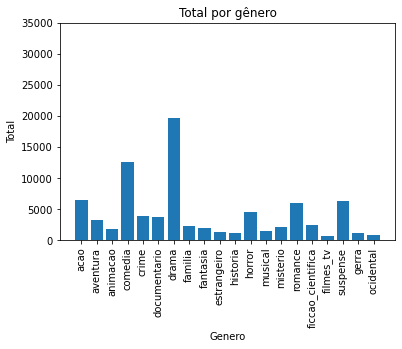

In [56]:
#plotando os totais por generos
plt.bar(lista_generos, lista_totais)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=90)

plt.xlabel("Genero")
plt.ylabel("Total")
plt.title("Total por gênero")

plt.show()

São 20 os tipos de gênero. Um filme tem no mínimo um gênero.
Conforme observamos os generos mais comuns são: drama, comédia, ação, suspense e romance.

######## Feature pais_producao ############

In [57]:
 df['pais_producao'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: pais_producao, dtype: object

In [60]:
type(df.pais_producao)

pandas.core.series.Series

In [63]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['pais_producao'] = df['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos paises, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_pais_producao'] = df['pais_producao'].apply(get_list) #O retorno será uma lista com todos os paises. quando coloco uma coluna que não existe, ele cria a coluna automaticamente


df[["novo_pais_producao", "pais_producao", "titulo_original"]].head(3)

ValueError: malformed node or string: [{'iso_3166_1': 'US', 'name': 'United States of America'}]

In [65]:
# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = df.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = df.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print (pais_producao_unicos)

total de registros do dataset:  44349
pais_producao_unicos:  155
['United States of America', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'China', 'Australia', 'South Africa', 'Canada', 'Switzerland', 'Belgium', 'Japan', 'Iran', 'Netherlands', 'Hong Kong', 'Tunisia', 'Dominican Republic', 'Croatia', 'Russia', 'Macedonia', 'Austria', 'Ireland', 'Taiwan', 'New Zealand', 'Mexico', 'Poland', 'Peru', 'Cuba', 'Liechtenstein', 'Denmark', 'Finland', 'Sweden', 'Argentina', 'Iceland', 'South Korea', 'Serbia', 'India', 'Brazil', 'Greece', 'Congo', 'Senegal', 'Burkina Faso', 'Romania', 'Hungary', 'Philippines', 'Czech Republic', 'Vietnam', 'Trinidad and Tobago', 'Chile', 'Portugal', 'Norway', 'Kazakhstan', 'Georgia', 'Luxembourg', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Turkey', 'Ecuador', 'Lebanon', 'Morocco', 'Bosnia and Herzegovina', 'Bahamas', 'Malaysia', 'Bhutan', 'Bulgaria', 'Jamaica', 'Pakistan', 'Nepal', "Cote D'Ivoire", 'Thailand', 'Namibia', 'Cameroon', 'Colombia', 'Czech

In [67]:
df.novo_pais_producao.head(3)

0    [United States of America]
1    [United States of America]
2    [United States of America]
Name: novo_pais_producao, dtype: object

In [68]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
pais_producao_x = te.fit(df.novo_pais_producao).transform(df.novo_pais_producao)
df_novo_pais_producao = pd.DataFrame(pais_producao_x, columns=te.columns_)

# resetando os índices
df_novo_pais_producao = df_novo_pais_producao.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo_pais_producao], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [69]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_pais_producao.drop(['index'],axis = 1, inplace = True)

In [70]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_pais = df_novo_pais_producao.columns
print (lista_pais)
tam = len(lista_pais)
print ("total de pais", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    pais = lista_pais[x]
    total_pais = sum(df_novo_pais_producao[pais] == True)    
    print ('pais: ', pais, '|',total_pais)
    x += 1
    lista_totais.append (total_pais)

tupla_pais_producao = list(zip(lista_totais,lista_pais))

del(tupla_pais_producao[0]) # excluindo o valor index

print (tupla_pais_producao)

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom',
       'United States Minor Outlying Islands', 'United States of America',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yugoslavia',
       'Zimbabwe'],
      dtype='object', length=155)
total de pais 155
pais:  Afghanistan | 8
pais:  Albania | 4
pais:  Algeria | 11
pais:  Angola | 3
pais:  Argentina | 239
pais:  Armenia | 8
pais:  Aruba | 6
pais:  Australia | 564
pais: Austria | 190
pais:  Azerbaijan | 2
pais:  Bahamas | 5
pais:  Bangladesh | 2
pais:  Barbados | 1
pais:  Belarus | 9
pais:  Belgium | 407
pais:  Bermuda | 1
pais:  Bhutan | 4
pais:  Bolivia | 10
pais: Bosnia and Herzegovina | 35
pais:  Botswana | 3
pais:  Brazil | 276
pais:  Brunei Darussalam | 1
pais:  Bulgaria | 51
pais:  Burkina Faso | 10
pais:  Cambodia | 9
pais:  Cameroon | 5
pais:  Canada | 1737
pais:  Cayman Islan

In [71]:
# ordenando e revertendo a ordenação
tupla_pais_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
tupla_pais_producao[0:10]

[(20903, 'United States of America'),
 (3947, 'United Kingdom'),
 (3737, 'France'),
 (2083, 'Germany'),
 (1919, 'Italy'),
 (1737, 'Canada'),
 (1624, 'Japan'),
 (875, 'Spain'),
 (870, 'Russia'),
 (818, 'India')]

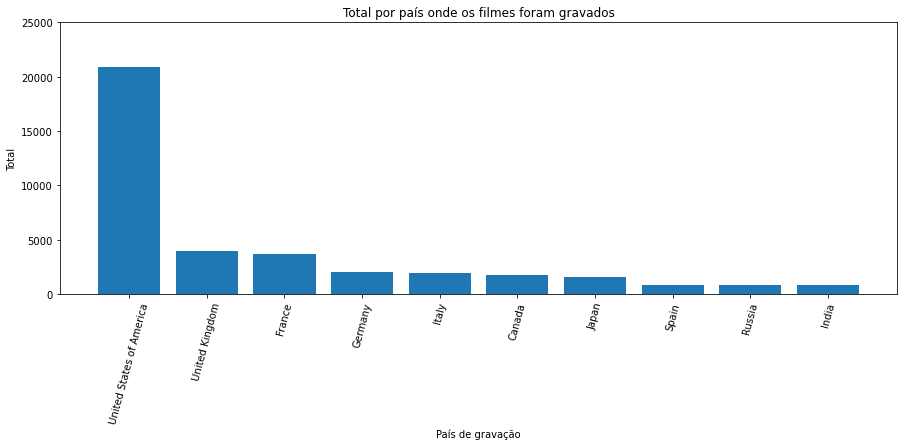

In [72]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in tupla_pais_producao[0:10]]
y = [v[0] for v in tupla_pais_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 25000)

plt.xticks(rotation=75)

plt.xlabel("País de gravação")
plt.ylabel("Total")
plt.title("Total por país onde os filmes foram gravados")

plt.show()

Observamos que os 10 países onde mais se grava filmes são:
(20903, 'United States of America'),
 (3947, 'United Kingdom'),
 (3737, 'France'),
 (2083, 'Germany'),
 (1919, 'Italy'),
 (1737, 'Canada'),
 (1624, 'Japan'),
 (875, 'Spain'),
 (870, 'Russia'),
 (818, 'India')

################# Feature idiomas_falados ################

In [73]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['idiomas_falados'] = df['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_idiomas_falados'] = df['idiomas_falados'].apply(get_list) 

In [74]:
# VALIDANDO TRANSFORMAÇÃO
df[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)

,novo_idiomas_falados,idiomas_falados,titulo_original
0,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,"[English, Français]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men


In [75]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(df.novo_idiomas_falados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = df.novo_idiomas_falados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = df.novo_idiomas_falados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

total de registros do dataset:  44349
idiomas_falados_unicos:  73
['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin', 'Nederlands', '广州话 / 廣州話', '普通话', 'shqip', 'Italiano', '한국어/조선말', 'Magyar', 'فارسی', 'Dansk', '日本語', 'العربية', 'Hrvatski', 'Bosanski', '', 'Română', 'Bahasa indonesia', 'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski', 'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'বাংলা', 'Srpski', 'Wolof', 'Cymraeg', 'Latviešu', 'Kiswahili', 'ελληνικά', 'Türkçe', 'ภาษาไทย', 'suomi', 'Esperanto', 'български език', 'Український', 'ქართული', 'Bokmål', 'No Language', 'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego', 'Kinyarwanda', 'қазақ', 'پښتو', 'Eesti', 'Lietuvi\x9akai', 'Slovenščina', 'తెలుగు', 'euskera', 'Fulfulde', 'ozbek', 'Hausa']


In [78]:
df.lingua_original.value_counts(normalize=True)


en    0.722948
fr    0.051365
ja    0.030328
it    0.028501
de    0.021692
        ...   
mt    0.000023
si    0.000023
lb    0.000023
tg    0.000023
la    0.000023
Name: lingua_original, Length: 89, dtype: float64

In [79]:
df.groupby(by='lingua_original').size().sort_values(ascending = False).head(10)

lingua_original
en    32062
fr     2278
ja     1345
it     1264
de      962
es      924
ru      782
hi      506
ko      444
zh      406
dtype: int64

In [ ]:
# visualizando as 10 linguas mais frequentes
dataset.groupby(by='lingua_original').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Idioma original')
plt.title('Os 10 idiomas originais mais frequentes')

o idioma mais frequente é o inglês(en), com 32062, seguindo do francês(fr) com 2278, japonês (ja) com 1345 e o italiano com 1264.

############### Feature cia_producao ######################

In [80]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['cia_producao'] = df['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_cia_producao'] = df['cia_producao'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

In [ ]:
# Criar uma lista que contenha somente valores únicos de cia, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_cia_producao)        
cia_unicos = [] # lista onde será incluídos os cia únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros):
    cia = df.novo_cia_producao[x]
    tam_cia = len(cia)
    i = z = b = 0
    while (i < tam_cia): 
        cada_cia_registo = df.novo_cia_producao[x][i]
        if (not cada_cia_registo in cia_unicos):      
            cia_unicos.append(cada_cia_registo) 
            z +=1
        i += 1        
    x += 1

print ("cia_unicos: ", len(cia_unicos))
#print (cia_unicos)

Tratamento das demais features

In [81]:
# verificando os valores da feature status
df.status.unique()

array(['Released', 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [82]:
df.status.value_counts()

Released           44010
Rumored              214
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: status, dtype: int64

In [90]:
df.status['Canceled']

KeyError: 'Canceled'

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [1]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*